In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math 

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
n = 4
arboles = f'../labs/arboles_1000_head.csv'
regresion = f'../runs/run_{n}/regression_{n}_head.csv'
normal = f'../runs/run_{n}/normalizaded_{n}_head.csv'
result = f'../runs/run_{n}/calculo_bio_car_{n}_head.csv'
#/home/gomosak/conafor/SEByc/runs/run_15/regression_15_head.csv /home/gomosak/conafor/SEByc/runs/run_15/calculo_bio_car_15_head.csv

In [8]:
df = pd.read_csv(arboles)

In [5]:
biomasa_eq = pd.read_csv(regresion)

In [6]:
nor = pd.read_csv(normal)

In [7]:
re = pd.read_csv(result)

In [9]:
df

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad
0,1,2005,60,1,Vivo,680.0,Ericaceae,Arctostaphylos,NaN,NaN,NaN,1,NaN,3.0,8.3,3.20,32.515597,-116.350450,11.1,MXL,caracteristica_vegetacion_mayor,107497,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN
1,2,2005,64,4,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,0.0,14.0,5.50,32.532903,-116.140585,11.1,MXL,caracteristica_vegetacion_mayor,101063,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN
2,3,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,NaN,17.0,5.50,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,1,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,74.0
3,4,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,2,NaN,NaN,14.5,5.85,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,2,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,61.0
4,5,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,3,NaN,NaN,21.0,6.25,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,3,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305125,1305126,2005,78002,4,Vivo,19494.0,Rhizophoraceae,Rhizophora,mangle,NaN,NaN,6,NaN,NaN,31.5,20.00,14.587356,-92.270686,15.6,VHL,caracteristica_arbolado,1267537,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN
1305126,1305127,2005,78002,4,Vivo,19494.0,Rhizophoraceae,Rhizophora,mangle,NaN,NaN,7,NaN,NaN,35.3,20.00,14.587356,-92.270686,15.6,VHL,caracteristica_arbolado,1267536,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN
1305127,1305128,2005,78002,4,Vivo,19494.0,Rhizophoraceae,Rhizophora,mangle,NaN,NaN,8,NaN,NaN,30.0,19.00,14.587356,-92.270686,15.6,VHL,caracteristica_arbolado,1267535,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN
1305128,1305129,2005,78002,4,Vivo,19494.0,Rhizophoraceae,Rhizophora,mangle,NaN,NaN,9,NaN,NaN,30.0,20.00,14.587356,-92.270686,15.6,VHL,caracteristica_arbolado,1267533,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN


# check


In [10]:
biomasa_eq.is_predicted.value_counts()

is_predicted
0.0    1304732
2.0        333
1.0         65
Name: count, dtype: int64

In [11]:
biomasa_eq.altura[biomasa_eq.altura == 0].value_counts()

altura
0.0    23211
Name: count, dtype: int64

In [13]:
biomasa_eq.diametro[biomasa_eq.diametro == 0].value_counts()


diametro
0.0    33720
Name: count, dtype: int64

In [14]:
biomasa_eq.diametro[biomasa_eq.diametro == 0].value_counts()


diametro
0.0    33720
Name: count, dtype: int64

# next 

In [15]:
biomasa_eq

,Unnamed: 0,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad
0,0,1,2005,60,1,Vivo,680.0,Ericaceae,Arctostaphylos,NaN,NaN,NaN,1,NaN,3.0,8.3,3.20,0.0,32.515597,-116.350450,11.1,MXL,caracteristica_vegetacion_mayor,107497,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN
1,1,2,2005,64,4,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,0.0,14.0,5.50,0.0,32.532903,-116.140585,11.1,MXL,caracteristica_vegetacion_mayor,101063,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN
2,2,3,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,NaN,17.0,5.50,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,1,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,74.0
3,3,4,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,2,NaN,NaN,14.5,5.85,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,2,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,61.0
4,4,5,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,3,NaN,NaN,21.0,6.25,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,3,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305125,1305125,1305126,2005,78002,4,Vivo,19494.0,Rhizophoraceae,Rhizophora,mangle,NaN,NaN,6,NaN,NaN,31.5,20.00,0.0,14.587356,-92.270686,15.6,VHL,caracteristica_arbolado,1267537,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN
1305126,1305126,1305127,2005,78002,4,Vivo,19494.0,Rhizophoraceae,Rhizophora,mangle,NaN,NaN,7,NaN,NaN,35.3,20.00,0.0,14.587356,-92.270686,15.6,VHL,caracteristica_arbolado,1267536,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN
1305127,1305127,1305128,2005,78002,4,Vivo,19494.0,Rhizophoraceae,Rhizophora,mangle,NaN,NaN,8,NaN,NaN,30.0,19.00,0.0,14.587356,-92.270686,15.6,VHL,caracteristica_arbolado,1267535,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN
1305128,1305128,1305129,2005,78002,4,Vivo,19494.0,Rhizophoraceae,Rhizophora,mangle,NaN,NaN,9,NaN,NaN,30.0,20.00,0.0,14.587356,-92.270686,15.6,VHL,caracteristica_arbolado,1267533,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN


In [18]:
re

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
0,1,2005,60,1,Vivo,680.0,Ericaceae,Arctostaphylos,NaN,NaN,NaN,1,NaN,3.0,8.3,3.20,0.0,32.515597,-116.350450,11.1,MXL,caracteristica_vegetacion_mayor,107497,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN,[b]*0.46,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.60590,NaN,NaN,9.939069,4.571972
1,2,2005,64,4,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,0.0,14.0,5.50,0.0,32.532903,-116.140585,11.1,MXL,caracteristica_vegetacion_mayor,101063,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,NaN,[b]*0.46,(0.058)*((([d130]**2)*[ht])**0.919),0.41033,NaN,NaN,35.514413,16.336630
2,3,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,1,NaN,NaN,17.0,5.50,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,1,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,74.0,[b]*0.46,(0.058)*((([d130]**2)*[ht])**0.919),0.41033,NaN,NaN,50.744201,23.342333
3,4,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,2,NaN,NaN,14.5,5.85,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,2,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,61.0,[b]*0.46,(0.058)*((([d130]**2)*[ht])**0.919),0.41033,NaN,NaN,40.090237,18.441509
4,5,2005,153,1,Vivo,26426.0,Pinaceae,Pinus,quadrifolia,NaN,NaN,3,NaN,NaN,21.0,6.25,0.0,32.448351,-116.077138,11.1,BCO,caracteristica_arbolado,3,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,[b]*0.46,(0.058)*((([d130]**2)*[ht])**0.919),0.41033,NaN,NaN,84.155168,38.711377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305125,1305126,2005,78002,4,Vivo,19494.0,Rhizophoraceae,Rhizophora,mangle,NaN,NaN,6,NaN,NaN,31.5,20.00,0.0,14.587356,-92.270686,15.6,VHL,caracteristica_arbolado,1267537,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN,[b]*0.45,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.92551,NaN,NaN,903.756597,406.690469
1305126,1305127,2005,78002,4,Vivo,19494.0,Rhizophoraceae,Rhizophora,mangle,NaN,NaN,7,NaN,NaN,35.3,20.00,0.0,14.587356,-92.270686,15.6,VHL,caracteristica_arbolado,1267536,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN,[b]*0.45,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.92551,NaN,NaN,1113.447658,501.051446
1305127,1305128,2005,78002,4,Vivo,19494.0,Rhizophoraceae,Rhizophora,mangle,NaN,NaN,8,NaN,NaN,30.0,19.00,0.0,14.587356,-92.270686,15.6,VHL,caracteristica_arbolado,1267535,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN,[b]*0.45,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.92551,NaN,NaN,788.546861,354.846087
1305128,1305129,2005,78002,4,Vivo,19494.0,Rhizophoraceae,Rhizophora,mangle,NaN,NaN,9,NaN,NaN,30.0,20.00,0.0,14.587356,-92.270686,15.6,VHL,caracteristica_arbolado,1267533,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN,[b]*0.45,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.92551,NaN,NaN,826.480640,371.916288


In [19]:
re = df[df['biomasa']<5000]

KeyError: 'biomasa'

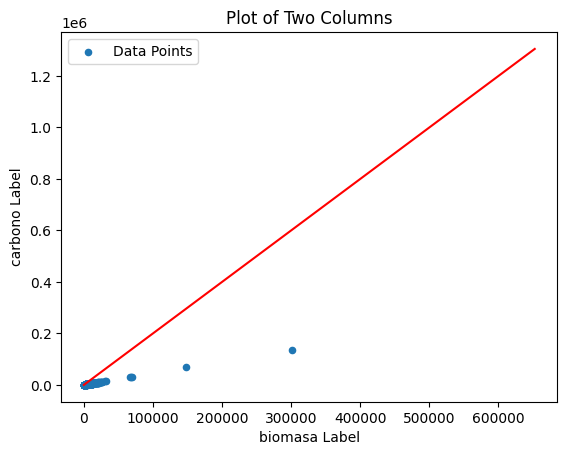

In [20]:
x = re.plot(kind='scatter', x='biomasa', y='carbono', label='Data Points')

# Now, use matplotlib's plot and axhline directly
# Plot the line x = y
plt.plot([x / 2 for x in range(len(df))],range(len(df)), color='red', label='x = y')

# Plot the line x = y
#ax.plot(range(1000),range(1000), color='red', label='x = y')
# Add labels and title
plt.xlabel('biomasa Label')
plt.ylabel('carbono Label')
plt.title('Plot of Two Columns')
plt.show()


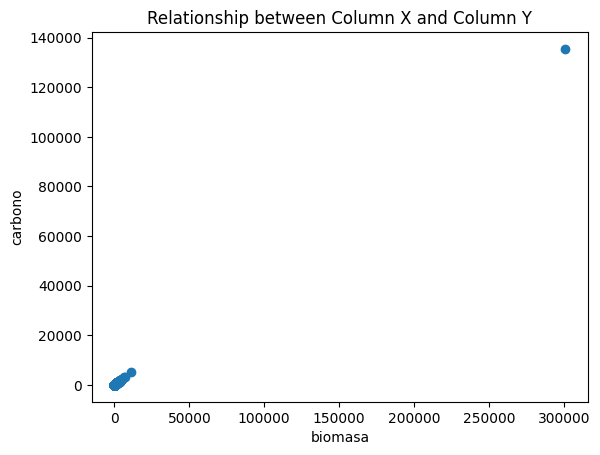

In [9]:
plt.scatter(df['biomasa'], df['carbono'])

# Add labels and title
plt.xlabel('biomasa')
plt.ylabel('carbono')
plt.title('Relationship between Column X and Column Y')

# Show the plot
plt.show()

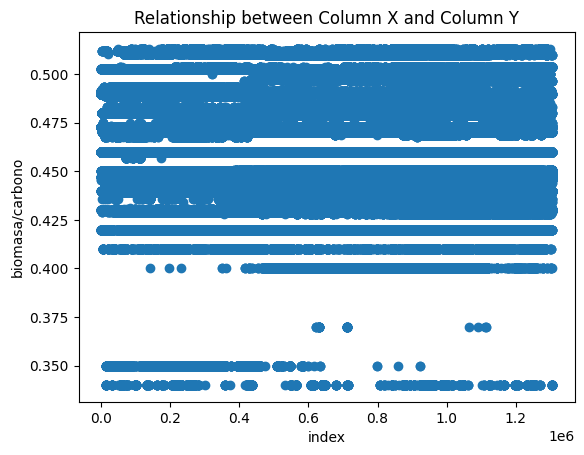

In [21]:
plt.scatter(range(len(re)),re['carbono']/re['biomasa'])

# Add labels and title
plt.xlabel('index')
plt.ylabel('biomasa/carbono')
plt.title('Relationship between Column X and Column Y')

# Show the plot
plt.show()

In [28]:
ree = re[re['carbono']/re['biomasa']>5]
ree

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
632,633,2005,526,4,Tocón,16945.0,Pinaceae,Pinus,jeffreyi,NaN,NaN,6,NaN,NaN,60.0,0.3,0.0,32.100447,-115.931521,11.1,BCO,caracteristica_arbolado,559,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.021*[d130]**2.6451),(0.058)*((([d130]**2)*[ht])**0.919),0.37733,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]),0.084823,35.574960,1060.735655
88724,88725,2007,13613,2,Tocón,5928.0,Pinaceae,Pinus,arizonica,NaN,NaN,8,NaN,NaN,0.3,0.3,0.0,28.763913,-107.390848,13.2,BE,caracteristica_arbolado,81293,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,(11.509+-3.1229*[d130]+0.31*[d130]**2+0.0004*[...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.41723,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]),0.000002,0.001843,10.600041
88730,88731,2007,13613,2,Tocón,5928.0,Pinaceae,Pinus,arizonica,NaN,NaN,14,NaN,NaN,0.3,0.3,0.0,28.763913,-107.390848,13.2,BE,caracteristica_arbolado,81281,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,(11.509+-3.1229*[d130]+0.31*[d130]**2+0.0004*[...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.41723,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]),0.000002,0.001843,10.600041
88759,88760,2007,13613,3,Tocón,5928.0,Pinaceae,Pinus,arizonica,NaN,NaN,20,NaN,NaN,0.3,0.3,0.0,28.763274,-107.390348,13.2,BE,caracteristica_arbolado,81323,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,(11.509+-3.1229*[d130]+0.31*[d130]**2+0.0004*[...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.41723,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]),0.000002,0.001843,10.600041
88773,88774,2007,13613,3,Tocón,5928.0,Pinaceae,Pinus,arizonica,NaN,NaN,34,NaN,NaN,0.3,0.3,0.0,28.763274,-107.390348,13.2,BE,caracteristica_arbolado,81337,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,(11.509+-3.1229*[d130]+0.31*[d130]**2+0.0004*[...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.41723,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]),0.000002,0.001843,10.600041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992061,992062,2007,62120,2,Tocón,18908.0,Cupressaceae,Cupressus,lusitanica,NaN,NaN,8,NaN,NaN,0.3,0.3,0.0,19.163334,-98.813330,13.4,AGR_AN,caracteristica_arbolado,955142,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,15,Mexico,NaN,(0.2637*[d130]**1.7698),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.41336,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]),0.000002,0.001828,0.031313
992062,992063,2007,62120,2,Tocón,18908.0,Cupressaceae,Cupressus,lusitanica,NaN,NaN,9,NaN,NaN,0.3,0.3,0.0,19.163334,-98.813330,13.4,AGR_AN,caracteristica_arbolado,955143,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,15,Mexico,NaN,(0.2637*[d130]**1.7698),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.41336,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]),0.000002,0.001828,0.031313
992100,992101,2007,62120,2,Tocón,18908.0,Cupressaceae,Cupressus,lusitanica,NaN,NaN,47,NaN,NaN,0.3,0.3,0.0,19.163334,-98.813330,13.4,AGR_AN,caracteristica_arbolado,955136,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,15,Mexico,NaN,(0.2637*[d130]**1.7698),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.41336,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]),0.000002,0.001828,0.031313
992145,992146,2007,62120,4,Tocón,18908.0,Cupressaceae,Cupress

In [52]:
ree = re[(re['carbono']/re['biomasa']>.8) & (re.condicion == "Vivo")]
ree.condicion.value_counts()

condicion
Vivo    15139
Name: count, dtype: int64

In [ ]:
especie_id	familia	genero	epiteto	condicion	componente	diametro_min	diametro_max	numero_arboles	r2		clave_ecoregion_n2		clave_bur	clave_estado_inegi
15181	Pinaceae	Pinus	hartwegii	Vivo	Todo el árbol	3.3	            57.2	          29	    0.987				  13.4			BCO	           15

In [39]:
(0.0309*27.8**2.4)

90.29547555694235

In [46]:
Exp(0.9173)*([d130]**1.0730)

10.680116183346986

In [50]:
math.exp(.9173)*(27.8)**1.0730

88.68259529890966

In [35]:
ree

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
101,102,2006,156,4,Vivo,8512.0,Pinaceae,Pinus,cembroides,NaN,NaN,2,NaN,NaN,27.8,7.9,0.0,32.464101,-115.924274,11.1,BCO,caracteristica_arbolado,103,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.0309*[d130]**2.4722),Exp(0.9173)*([d130]**1.0730),0.51314,NaN,NaN,88.682595,114.795807
104,105,2006,156,4,Vivo,8512.0,Pinaceae,Pinus,cembroides,NaN,NaN,5,NaN,NaN,27.0,7.0,0.0,32.464101,-115.924274,11.1,BCO,caracteristica_arbolado,106,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.0309*[d130]**2.4722),Exp(0.9173)*([d130]**1.0730),0.51314,NaN,NaN,85.947183,106.801162
106,107,2006,156,4,Vivo,8512.0,Pinaceae,Pinus,cembroides,NaN,NaN,7,NaN,NaN,25.7,8.8,0.0,32.464101,-115.924274,11.1,BCO,caracteristica_arbolado,108,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.0309*[d130]**2.4722),Exp(0.9173)*([d130]**1.0730),0.51314,NaN,NaN,81.514819,94.535548
107,108,2006,156,4,Vivo,8512.0,Pinaceae,Pinus,cembroides,NaN,NaN,8,NaN,NaN,19.9,5.2,0.0,32.464101,-115.924274,11.1,BCO,caracteristica_arbolado,109,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.0309*[d130]**2.4722),Exp(0.9173)*([d130]**1.0730),0.51314,NaN,NaN,61.950908,50.232299
1294,1295,2006,2391,2,Vivo,16945.0,Pinaceae,Pinus,jeffreyi,NaN,NaN,1,NaN,NaN,61.5,12.3,0.0,31.013931,-115.440865,11.1,BCO,caracteristica_arbolado,794,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.1,11.1.1.3,2,Baja California,120.0,(0.021*[d130]**2.6451),(0.058)*((([d130]**2)*[ht])**0.919),0.37733,NaN,NaN,1129.804379,1132.329608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303384,1303385,2005,77748,2,Vivo,22892.0,Bixaceae,Bixa,orellana,NaN,NaN,10,NaN,NaN,8.6,3.0,0.0,15.484558,-92.905673,15.6,P,caracteristica_arbolado,1265810,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.2,7,Chiapas,NaN,(1.0096*[d130]**1.2235),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.35652,NaN,NaN,6.151075,14.044562
1303422,1303423,2005,77748,4,Vivo,5102.0,Lauraceae,Persea,americana,NaN,NaN,3,NaN,NaN,10.5,6.0,0.0,15.484029,-92.905979,15.6,P,caracteristica_arbolado,1265839,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.2,7,Chiapas,NaN,(1.0096*[d130]**1.2235),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.45382,NaN,NaN,20.869340,17.929759
1303851,1303852,2005,77797,3,Vivo,27599.0,Apocynaceae,Plumeria,rubra,NaN,NaN,10,NaN,NaN,9.3,6.0,0.0,15.379591,-92.679862,15.6,P,caracteristica_arbolado,1266265,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.2,7,Chiapas,NaN,(1.0096*[d130]**1.2235),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.50744,NaN,NaN,18.508774,15.455684
1303998,1303999,2007,77809,1,Vivo,11522.0,Apocynaceae,Stemmadenia,donnell-smithii,NaN,NaN,22,NaN,NaN,9.5,6.2,0.0,15.357814,-93.053537,15.6,P,caracteristica_arbolado,1266398,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN,(1.0096*[d130]**1.2235),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.44840,NaN,NaN,17.706964,15.863323


In [53]:
ree.carbon_eq.value_counts()

carbon_eq
(0.2249*[d130]**1.8168)                                                  4431
(11.509+-3.1229*[d130]+0.31*[d130]**2+0.0004*[d130]**2*[ht] )            2667
(0.0309*[d130]**2.4722)                                                  1915
(0.0192922*([d130]**2*[ht])**0.9392)                                     1837
(1.0096*[d130]**1.2235)                                                  1373
(0.021*[d130]**2.6451)                                                   1312
(0.2637*[d130]**1.7698)                                                   837
(0.0192*[d130]**2.7569)                                                   422
(0.557*[d130]**2)                                                          85
(0.0809*[d130]**2.2782)                                                    75
(0.009*[d130]**2.7517)                                                     72
(0.006*[d130]**3.038)                                                      52
(0.0196*[d130]**2.7353)                               

In [65]:
math.exp(-2.187+(0.916*(math.log((.5567)*((93)**2)*(21)))))

4311.224538722012

In [62]:
-2.187+(0.916*math.exp(.5567)*93**2*21)

290301.40104575636

In [54]:
ree[ree.carbon_eq == "(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.017832*[d130]**2*[d130] )"]

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
606089,606090,2007,51709,3,Vivo,26396.0,Acanthaceae,Blechum,pyramidatum,NaN,NaN,3,NaN,NaN,94.4,21.0,0.0,21.077144,-104.664873,13.4,SC,caracteristica_arbolado,570172,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.1,18,Nayarit,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.55677,NaN,NaN,4431.375912,14712.740347
606104,606105,2007,51709,3,Vivo,10766.0,Sapindaceae,Thouinidium,decandrum,NaN,NaN,18,NaN,NaN,93.0,12.0,0.0,21.077144,-104.664873,13.4,SC,caracteristica_arbolado,570169,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.1,18,Nayarit,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.67975,NaN,NaN,3100.420739,14074.229254
622542,622543,2007,52191,4,Vivo,8047.0,Tiliaceae,Luehea,candida,NaN,NaN,1,NaN,NaN,91.2,7.9,0.0,20.997900,-103.890940,13.4,AGR_AN,caracteristica_arbolado,586584,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,14,Jalisco,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.62163,NaN,NaN,1879.360990,13281.219916
863051,863052,2007,58568,4,Vivo,31141.0,Theaceae,Cleyera,theoides,NaN,NaN,11,NaN,NaN,86.7,8.3,0.0,19.812023,-99.612237,13.4,BE,caracteristica_arbolado,826370,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,15,Mexico,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.60568,NaN,NaN,1750.085590,11432.289108
912563,912564,2005,59742,1,Vivo,8334.0,Betulaceae,Carpinus,caroliniana,NaN,NaN,16,NaN,NaN,89.0,21.0,0.0,19.594803,-103.679820,13.4,BCO,caracteristica_arbolado,875701,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,14,Jalisco,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.59064,NaN,NaN,4199.185593,12353.815078
912626,912627,2005,59742,3,Vivo,8334.0,Betulaceae,Carpinus,caroliniana,NaN,NaN,26,NaN,NaN,79.8,24.0,0.0,19.594497,-103.679570,13.4,BCO,caracteristica_arbolado,875766,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,14,Jalisco,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.59064,NaN,NaN,3885.728905,8949.412967
912634,912635,2005,59742,4,Vivo,8334.0,Betulaceae,Carpinus,caroliniana,NaN,NaN,5,NaN,NaN,107.5,21.5,0.0,19.594692,-103.680320,13.4,BCO,caracteristica_arbolado,875774,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,14,Jalisco,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.59064,NaN,NaN,6064.341357,21663.765938
931477,931478,2007,60247,1,Vivo,33264.0,Winteraceae,Drimys,winteri,NaN,NaN,12,NaN,NaN,91.0,37.5,0.0,19.504280,-103.678820,13.4,BM,caracteristica_arbolado,894607,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.4,14,Jalisco,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.41500,NaN,NaN,5384.017919,13195.023342
931505,931506,2007,60247,3,Vivo,33264.0,Winteraceae,Drimys,winteri,NaN,NaN,14,NaN,NaN,80.5,35.5,0.0,19.504113,-103.678514,13.4,BM,caracteristica_arbolado,894642,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.4,14,Jalisco,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.41500,NaN,NaN,4090.319653,9182.697391
95823

In [61]:
de = re.drop(632, axis=0)

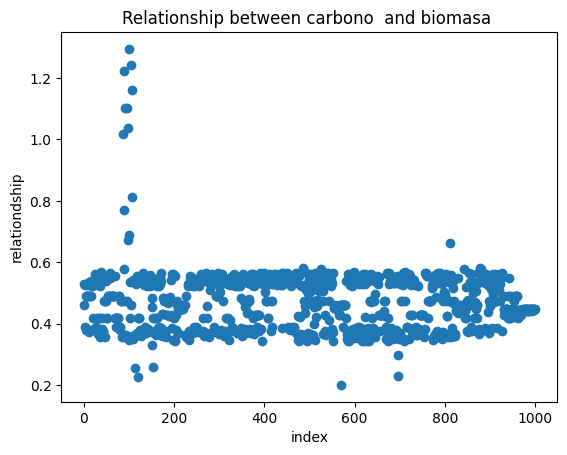

In [64]:
plt.scatter(range(len(de)),de['carbono']/de['biomasa'])

# Add labels and title
plt.xlabel('index')
plt.ylabel('relationdship')
plt.title('Relationship between carbono  and biomasa ')

# Show the plot
plt.show()

In [79]:
re[(re.carbon_eq == "(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.017832*[d130]**2*[d130] )") & (re.condicion != "Tocón")]

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
606089,606090,2007,51709,3,Vivo,26396.0,Acanthaceae,Blechum,pyramidatum,NaN,NaN,3,NaN,NaN,94.4,21.0,0.0,21.077144,-104.664873,13.4,SC,caracteristica_arbolado,570172,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.1,18,Nayarit,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.55677,NaN,NaN,4431.375912,14712.740347
606104,606105,2007,51709,3,Vivo,10766.0,Sapindaceae,Thouinidium,decandrum,NaN,NaN,18,NaN,NaN,93.0,12.0,0.0,21.077144,-104.664873,13.4,SC,caracteristica_arbolado,570169,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.1,18,Nayarit,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.67975,NaN,NaN,3100.420739,14074.229254
622542,622543,2007,52191,4,Vivo,8047.0,Tiliaceae,Luehea,candida,NaN,NaN,1,NaN,NaN,91.2,7.9,0.0,20.997900,-103.890940,13.4,AGR_AN,caracteristica_arbolado,586584,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,14,Jalisco,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.62163,NaN,NaN,1879.360990,13281.219916
850555,850556,2007,58293,3,Muerto,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,4.6,0.0,19.871017,-100.760428,13.4,BCO,caracteristica_arbolado,813873,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,16,Michoacan,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.55677,NaN,NaN,NaN,NaN
863051,863052,2007,58568,4,Vivo,31141.0,Theaceae,Cleyera,theoides,NaN,NaN,11,NaN,NaN,86.7,8.3,0.0,19.812023,-99.612237,13.4,BE,caracteristica_arbolado,826370,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,15,Mexico,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.60568,NaN,NaN,1750.085590,11432.289108
871738,871739,2007,58764,2,Muerto,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,84.4,2.5,0.0,19.785491,-102.341738,13.4,BCO,caracteristica_arbolado,835058,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,16,Michoacan,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.55677,NaN,NaN,513.818143,10558.581281
882182,882183,2007,59022,3,Muerto,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,2.9,0.0,19.739855,-102.053899,13.4,BCO,caracteristica_arbolado,845419,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,16,Michoacan,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.55677,NaN,NaN,NaN,NaN
893213,893214,2005,59300,3,Muerto,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,10.2,0.0,19.690082,-100.810345,13.4,BCO,caracteristica_arbolado,856461,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,16,Michoacan,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.55677,NaN,NaN,NaN,NaN
912563,912564,2005,59742,1,Vivo,8334.0,Betulaceae,Carpinus,caroliniana,NaN,NaN,16,NaN,NaN,89.0,21.0,0.0,19.594803,-103.679820,13.4,BCO,caracteristica_arbolado,875701,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.4.2,13.4.2.2,14,Jalisco,NaN,(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.01...,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.59064,NaN,NaN,4199.185593,12353.815078
912626,912627,2005,59742,3,Vivo,8334.0,Betulaceae,Carpinus,caroliniana,NaN,NaN,26,NaN,NaN,79.8,24.0,0.0,19.594497,-103.679570,1

In [68]:
out = re[(re['carbono']/re['biomasa']>.8) | (re['carbono']/re['biomasa']<.0)]

In [76]:
out.carbon_eq.value_counts()

carbon_eq
(0.2249*[d130]**1.8168)                                                  5235
(11.509+-3.1229*[d130]+0.31*[d130]**2+0.0004*[d130]**2*[ht] )            3182
(0.0309*[d130]**2.4722)                                                  2169
(0.0192922*([d130]**2*[ht])**0.9392)                                     1905
(1.0096*[d130]**1.2235)                                                  1629
(0.021*[d130]**2.6451)                                                   1508
(-43.271+8.5861*[d130]+-0.11843*[d130]**2+0.017832*[d130]**2*[d130] )    1189
(0.2637*[d130]**1.7698)                                                   912
(0.035*[d130]**2.513)                                                     484
(0.0192*[d130]**2.7569)                                                   479
(0.009*[d130]**2.7517)                                                    111
(0.557*[d130]**2)                                                          90
(0.0809*[d130]**2.2782)                               

In [72]:
out.biomasa_eq.value_counts()


biomasa_eq
(-0.3193)+((0.0256)*(([d130]**2)*[ht]))                    5576
Exp(0.9173)*([d130]**1.0730)                               4436
(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([ht]))))))    3081
(2354.14*Exp(-57.453/[d130])+1.3)                          1119
(0.003)*([d130]**3.383)                                     865
(0.00166)*([d130]**3.6586)                                  722
(2543.055*Exp(-56.209/[d130])+1.3)                          498
(0.182)*([d130]**1.936)                                     409
(0.0514)*([d130]**2.5222)                                   329
(0.283)*((([d130]**2)*[ht])**0.807)                         310
Exp(-3.101)*([d130]**2.333)                                 299
(Exp(-3.139)*[d130]**2.585)                                 256
Exp(-1.90)*([d130]**2.15)                                   230
(0.058)*((([d130]**2)*[ht])**0.919)                         199
(0.35179)*([d130]**2)                                       126
(Exp(-3.573)*[d130]**2.746)  

In [ ]:
(Exp(-2.187+(0.916*(LN((p)*((d130)^2)*(ht))))))

In [ ]:
b*0.447

In [75]:
(math.exp(-2.187+(0.916*(math.log((.51314)*((23.4)**2)*(4.1))))))


71.5298786709126

In [73]:
out

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
86,87,2006,156,1,Muerto,8512.0,Pinaceae,Pinus,cembroides,NaN,NaN,5,NaN,NaN,23.4,4.1,0.0,32.464240,-115.923774,11.1,BCO,caracteristica_arbolado,85,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.0309*[d130]**2.4722),Exp(0.9173)*([d130]**1.0730),0.51314,NaN,NaN,73.713485,74.978012
90,91,2006,156,1,Muerto,8512.0,Pinaceae,Pinus,cembroides,NaN,NaN,9,NaN,NaN,26.7,5.5,0.0,32.464240,-115.923774,11.1,BCO,caracteristica_arbolado,89,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.0309*[d130]**2.4722),Exp(0.9173)*([d130]**1.0730),0.51314,NaN,NaN,84.922919,103.891405
91,92,2006,156,3,Muerto,8512.0,Pinaceae,Pinus,cembroides,NaN,NaN,1,NaN,NaN,24.8,5.0,0.0,32.463935,-115.923469,11.1,BCO,caracteristica_arbolado,90,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.0309*[d130]**2.4722),Exp(0.9173)*([d130]**1.0730),0.51314,NaN,NaN,78.455787,86.560932
96,97,2006,156,3,Muerto,8512.0,Pinaceae,Pinus,cembroides,NaN,NaN,6,NaN,NaN,24.8,5.5,0.0,32.463935,-115.923469,11.1,BCO,caracteristica_arbolado,95,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.0309*[d130]**2.4722),Exp(0.9173)*([d130]**1.0730),0.51314,NaN,NaN,78.455787,86.560932
97,98,2006,156,3,Muerto,8512.0,Pinaceae,Pinus,cembroides,NaN,NaN,7,NaN,NaN,23.7,5.5,0.0,32.463935,-115.923469,11.1,BCO,caracteristica_arbolado,96,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,11,11.1.3,11.1.3.1,2,Baja California,NaN,(0.0309*[d130]**2.4722),Exp(0.9173)*([d130]**1.0730),0.51314,NaN,NaN,74.727990,77.376903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303399,1303400,2005,77748,2,Muerto,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,13.0,4.0,0.0,15.484558,-92.905673,15.6,P,caracteristica_arbolado,1265812,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.2,7,Chiapas,NaN,(1.0096*[d130]**1.2235),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.58220,NaN,NaN,26.744549,23.284077
1303422,1303423,2005,77748,4,Vivo,5102.0,Lauraceae,Persea,americana,NaN,NaN,3,NaN,NaN,10.5,6.0,0.0,15.484029,-92.905979,15.6,P,caracteristica_arbolado,1265839,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.2,7,Chiapas,NaN,(1.0096*[d130]**1.2235),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.45382,NaN,NaN,20.869340,17.929759
1303851,1303852,2005,77797,3,Vivo,27599.0,Apocynaceae,Plumeria,rubra,NaN,NaN,10,NaN,NaN,9.3,6.0,0.0,15.379591,-92.679862,15.6,P,caracteristica_arbolado,1266265,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.2,7,Chiapas,NaN,(1.0096*[d130]**1.2235),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.50744,NaN,NaN,18.508774,15.455684
1303998,1303999,2007,77809,1,Vivo,11522.0,Apocynaceae,Stemmadenia,donnell-smithii,NaN,NaN,22,NaN,NaN,9.5,6.2,0.0,15.357814,-93.053537,15.6,P,caracteristica_arbolado,1266398,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,15,15.6.1,15.6.1.1,7,Chiapas,NaN,(1.0096*[d130]**1.2235),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.44840,NaN,NaN,17.706964,15.863323
